<a href="https://colab.research.google.com/github/echiyembekeza/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Eric_Chiyembekeza_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO load data
import pandas as pd
col_names = ['Age', 'Op_year', 'Num_nodes', 'Surv_stat']
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=col_names)
#we now need to make this data make sense
#let's add some names to these features
#we can get the features from the attributes above
#==============#
#Age of patient at time of operation (numerical)
#Patient's year of operation (year - 1900, numerical)
#Number of positive axillary nodes detected (numerical)
#Survival status (class attribute) -- 1 = the patient survived 5 years or longer -- 2 = the patient died within 5 year

df.head()

,Age,Op_year,Num_nodes,Surv_stat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
#Validate the appropriate number of obs.
#The UCI site says that there are 306 instances with 4 attributes
#running the shape of the dataframe will produce these results
df.shape

(306, 4)

In [0]:
#Look for missing values
print (df.isnull()) #running this appears to show that there are no missing values.
#but let's be sure by also running the sum
df.isnull().sum()

       Age  Op_year  Num_nodes  Surv_stat
0    False    False      False      False
1    False    False      False      False
2    False    False      False      False
3    False    False      False      False
4    False    False      False      False
5    False    False      False      False
6    False    False      False      False
7    False    False      False      False
8    False    False      False      False
9    False    False      False      False
10   False    False      False      False
11   False    False      False      False
12   False    False      False      False
13   False    False      False      False
14   False    False      False      False
15   False    False      False      False
16   False    False      False      False
17   False    False      False      False
18   False    False      False      False
19   False    False      False      False
20   False    False      False      False
21   False    False      False      False
22   False    False      False    

Age          0
Op_year      0
Num_nodes    0
Surv_stat    0
dtype: int64

In [0]:
change_surv = {2:0}
df['Surv_stat'] = df['Surv_stat'].replace(change_surv)
df.head

<bound method NDFrame.head of      Age  Op_year  Num_nodes  Surv_stat
0     30       64          1          1
1     30       62          3          1
2     30       65          0          1
3     31       59          2          1
4     31       65          4          1
5     33       58         10          1
6     33       60          0          1
7     34       59          0          0
8     34       66          9          0
9     34       58         30          1
10    34       60          1          1
11    34       61         10          1
12    34       67          7          1
13    34       60          0          1
14    35       64         13          1
15    35       63          0          1
16    36       60          1          1
17    36       69          0          1
18    37       60          0          1
19    37       63          0          1
20    37       58          0          1
21    37       59          6          1
22    37       60         15          1
23    37  

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
# TODO
#Let's descibe the data
stats = df.describe()
print(stats)


              Age     Op_year   Num_nodes   Surv_stat
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    0.735294
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    0.000000
25%     44.000000   60.000000    0.000000    0.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    1.000000
max     83.000000   69.000000   52.000000    1.000000


In [0]:
#Let's include some binning for the age since that is continuous
age_bins = pd.cut(df['Age'], 5)
node_bins = pd.cut(df['Num_nodes'], 5)
#let's crosstab some stuff
ct = pd.crosstab([df['Num_nodes'],node_bins], [df['Surv_stat'], age_bins])
ct_norm = pd.crosstab([df['Num_nodes'],node_bins], [df['Surv_stat'], age_bins], normalize=True)
print(ct)
print(ct_norm)

Surv_stat                                  0                            \
Age                           (29.947, 40.6] (40.6, 51.2] (51.2, 61.8]   
Num_nodes      Num_nodes                                                 
(-0.052, 10.4] (-0.052, 10.4]              3           22           19   
(10.4, 20.8]   (10.4, 20.8]                0            6            5   
(20.8, 31.2]   (20.8, 31.2]                1            2            2   
(31.2, 41.6]   (31.2, 41.6]                0            0            1   
(41.6, 52.0]   (41.6, 52.0]                0            1            0   

Surv_stat                                                            1  \
Age                           (61.8, 72.4] (72.4, 83.0] (29.947, 40.6]   
Num_nodes      Num_nodes                                                 
(-0.052, 10.4] (-0.052, 10.4]           11            3             35   
(10.4, 20.8]   (10.4, 20.8]              4            0              3   
(20.8, 31.2]   (20.8, 31.2]          

AxesSubplot(0.125,0.125;0.775x0.755)


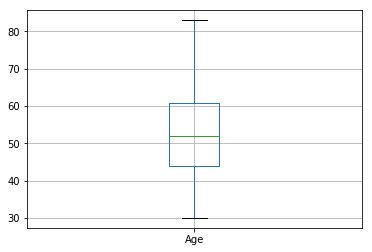

In [0]:
#This gives us a pictoral depiction of statistical data
age_box = df.boxplot('Age')
print(age_box)

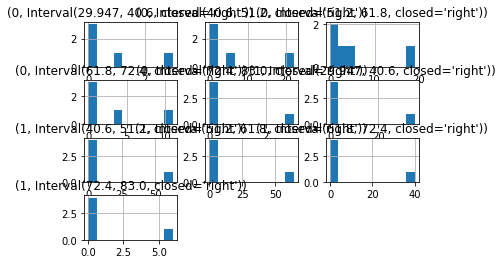

In [0]:
ct.hist();

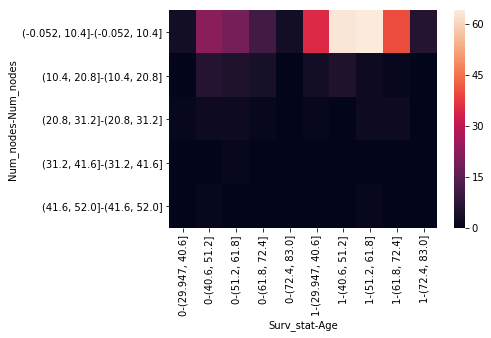

In [0]:
import seaborn as sns
sns.heatmap(pd.crosstab([df['Num_nodes'],node_bins], [df['Surv_stat'], age_bins]));

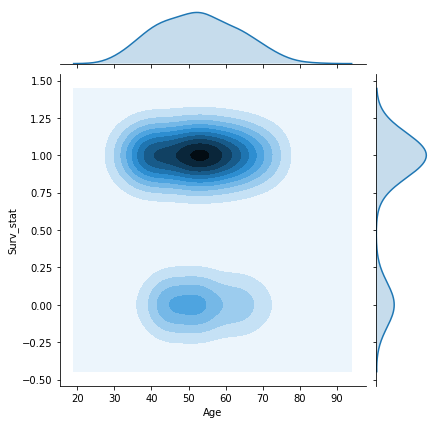

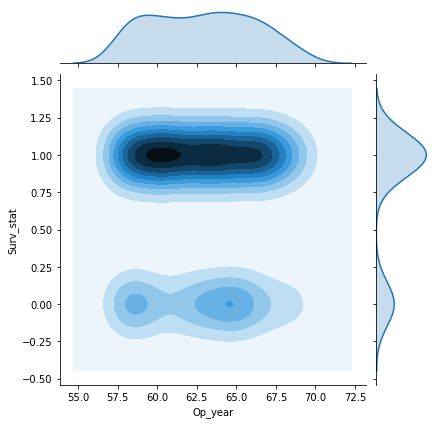

In [0]:
age_kde = sns.jointplot(x='Age', y='Surv_stat', data=df, kind="kde");
print(age_kde)
year_kde = sns.jointplot(x='Op_year', y='Surv_stat', data=df, kind="kde");
print(year_kde)



## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

*One feature that appeared to really have a positive relationship with survival would be the number of nodes. I decided to "bin" the number of nodes since the range of that feature was from 0 to 52. I "binned" the nodes feature into 5 bins, much like I did with age. Based on the heat map, it appears that the most positive relationship with survival were in individuals with 0 to 10.4 nodes.*

- What is at least one feature that looks to have a negative relationship with survival?

*The feature that seems to have a slightly negative relationship with survival would be the operation year. While the relationship seems to be slight, there is a much higher density (signifying higher survival) in the earlier years of operation.*

- How are those two features related with each other, and what might that mean?
*From the visualization below (especially), it is pretty clear that there is no real correlation or relationship between the operation year and the number of nodes meaning that this could be a spurious relationship.*

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

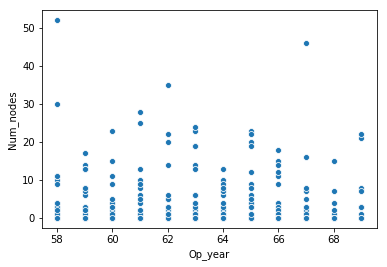

In [0]:
node_year = sns.scatterplot(x='Op_year', y='Num_nodes', data=df);